In [1]:
import os
import sys
sys.path.append(os.pardir)
from dataset.mnist import *

import numpy as np
import matplotlib.pyplot as plt
from simpleDL.model import *
from simpleDL.function_class import *
from simpleDL.function import *
from simpleDL.data import *
from simpleDL.optimizer import *
from simpleDL.trainer import *

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False)

In [3]:
x_train[1].shape

(1, 28, 28)

In [4]:
network = Model(
    ConvLayer(input_channel = 1, output_channel = 30, kernel_size = 5, stride = 1, padding=0),
    ReLU(),
    MaxPoolingLayer(kernel_size=2, stride=2),
    DenseLayer(4320, 100),
    ReLU(),
    DenseLayer(100, 10)
)

In [5]:
print(network)

0. ConvLayer1 : ConvLayer (30, 1, 5, 5) 
1. Function1 : Function
2. MaxPoolingLayer1 : MaxPoolingLayer
3. DenseLayer1 : DenseLayer (4320, 100) 
4. Function2 : Function
5. DenseLayer2 : DenseLayer (100, 10) 



In [6]:
epochs = 3
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [7]:
iter_per_epoch = max(train_size / batch_size, 1)
critic = CrossEntropyLoss()

In [8]:
train_data = DataLoader(x_train, y_train, batch_size=batch_size)
valid_data = DataLoader(x_test, y_test, batch_size=batch_size)
optim = Adam()

In [9]:
mnist_trainer = ClassificationTrainer(network,
                                    critic,
                                    optim,
                                    epochs,
                                    init_lr = 0.001
                                    )

In [10]:
mnist_trainer.train(train_data, valid_data)

epoch 1


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.18132038200059072    train accuarcy : 95.0266666666666745
epoch 1 -- train loss : 0.99639462014099    train accuarcy : 95.02666666666667


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.05030393057758402    valid accuarcy : 97.8999999999999937
epoch 1 -- valid loss : 0.06543094238040405    valid accuarcy : 97.89999999999999
--------------------------------
epoch 2


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.17433796342261984    train accuarcy : 98.36666666666667868
epoch 2 -- train loss : 0.32604982345519723    train accuarcy : 98.36666666666667


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.02069249835519695    valid accuarcy : 98.29191919191921916
epoch 2 -- valid loss : 0.0514994352012082    valid accuarcy : 98.2
--------------------------------
epoch 3


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.1657620154744735    train accuarcy : 98.98833333333333738
epoch 3 -- train loss : 0.20207337025302097    train accuarcy : 98.98833333333333


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.009982954011595383    valid accuarcy : 98.5099999999999913
epoch 3 -- valid loss : 0.04379462267928308    valid accuarcy : 98.50999999999999
--------------------------------


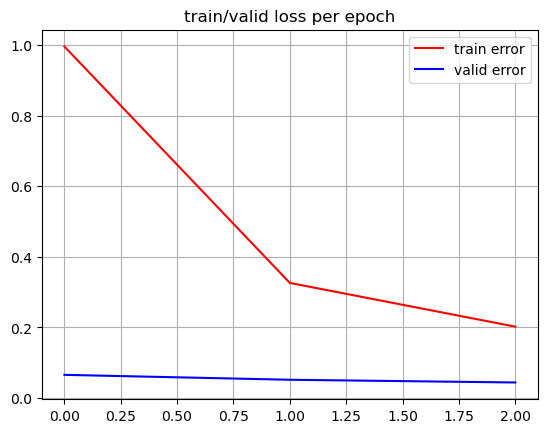

In [11]:
mnist_trainer.show_error_graph()

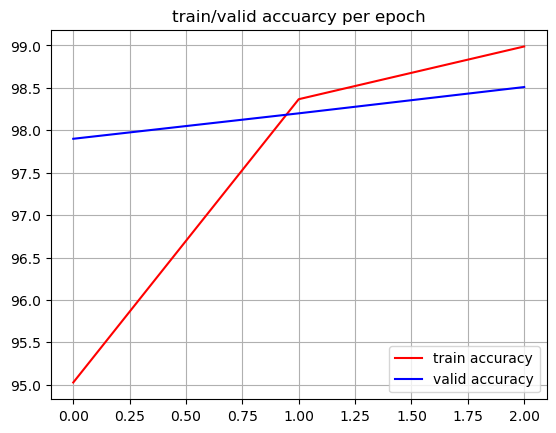

In [12]:
mnist_trainer.show_accuracy_graph()

In [ ]:
for epoch in range(10):
    train_correct_count = 0
    test_correct_count = 0
    for x, y in train_data:
        pred = network(x)
        train_loss = critic(pred, y)
        p = np.argmax(critic.pred, axis=1)
        if y.ndim != 1:
            y = np.argmax(y, axis=1)
        train_loss_list.append(train_loss)
        network._backward(critic)

        grad = network.gradient()
        
        optim.update(network)

        train_correct_count += np.sum(p==y)


    for x, y in test_data:
        pred = network(x)
        softmax(pred)
        p = np.argmax(pred, axis=1)
        if y.ndim != 1:
            y = np.argmax(y, axis=1)
        test_correct_count += np.sum(p==y)


    train_acc = float(train_correct_count)/len(x_train)
    train_acc_list.append(train_acc)
    test_acc = float(test_correct_count)/len(x_test)
    test_acc_list.append(test_acc)
    print(f"train acc : {train_acc}")
    print(f"test acc : {test_acc}")